Research Question: How has an increase in pollution levels over the last couple decades affected public sentiment towards environmental activism and sustainable practices? 
What is the correlation between climate change throughout the years and sentiment towards environmental activism/sustainable practices, for example a plant-based diet?

Data Cleaning: For the environmental pollution (greenhouse gas emissions) dataset (the first dataset loaded into this jupyter notebook) the first step was to drop columns 1-3 of the dataset because column 1 contained the indices and not values and columns 2-3 only contained NaN values since they were empty. After removing the columns, we relabeled the row indices to start from 0 again and changed the column names from unnamed to the names given from column 1 (which we previously removed). We then sorted the values of the state column. Finally, we removed all commas from each of the values in the data set and converted them to floats so that we could find the mean for each state from the years 2011-2018. We repeated the same steps to sort the data set by industry sector as well. 

For the school survey data set (the second dataset loaded into this jupyter notebook), we first dropped the first column since it contained the names for the column indices and renamed the columns. 


Data Description: For the dataset on greenhouse gas emissions, each observation is of a facility that emits greenhouse gases. The majority of the facilities include power plants and chemical production centers. The attributes for each of these observations include FRS ID, facility name, city, state, zip code, address, county, latitude, longitude, NAICS code, industry subparts, industry sector, and emission for the years 2011 through 2018.  This dataset was created by the Environmental Protection Agency (EPA) in order to monitor greenhouse gas emissions for specific facilities across industries over time. Since the EPA sets environmental regulations, this data was likely collected in order to better understand how much pollution certain facilities contribute to the environment in order to determine a plan for regulating these industries. Given this, each facility likely provides the EPA with this data and is aware of the data collection that is occurring. The raw data can be found on our github page under the csv file that is named ghgp_data_by_year.

Data Limitations: For our research question, we are interested in the relationship between climate change throughout the years and sentiment towards environmental activism/sustainable practices in the general public. This dataset, however, shows pollution levels by specific facilities and industries and not the general public. Because the dataset doesn’t reflect the entire population of who we’re trying to analyze, the trends we find might not be generalizable to the entire public and it might be difficult to bring the dataset of greenhouse gas emissions and the school survey together. Since this data was collected by the EPA likely to regulate emissions, the emissions over time for each observation might be affected by certain EPA regulations. 

Questions: 
Do you have any advice for what kind of further analysis we could do with the dataset on greenhouse gas emissions?
How do you think we can connect both of the datasets to see trends in behavior versus pollution levels?


Exploratory data analysis:

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
## load data on ghg data
ghg_data = pd.read_csv("ghgp_data_by_year.csv")
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,This data was reported to EPA by facilities as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All emissions data is presented in units of me...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Latest Reported Industry Type (subparts),Latest Reported Industry Type (sectors),2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
3,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
4,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"


In [3]:
## Get rid of first two rows because they are just an explanation
ghg_data = ghg_data.dropna()
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Latest Reported Industry Type (subparts),Latest Reported Industry Type (sectors),2018 Total reported direct emissions,2017 Total reported direct emissions,2016 Total reported direct emissions,2015 Total reported direct emissions,2014 Total reported direct emissions,2013 Total reported direct emissions,2012 Total reported direct emissions,2011 Total reported direct emissions
3,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
4,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
5,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
6,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"


In [4]:
#remove first row that had desired column names in undesired location
ghg_data = ghg_data.drop([2],axis=0)
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
3,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
4,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
5,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
6,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"
7,1000005,110000482022,Ardagh Glass Inc. (Madera),MADERA,CA,93637,24441 AVENUE 12 & ROAD 24 1/2,MADERA COUNTY,36.92,-120.10,...,"C,N",Minerals,"83,863.02","82,451.32","79,708.58","81,133.62","74,754.14","78,249.77","82,149.61","75,969.47"


In [5]:
## Reset index
ghg_data = ghg_data.reset_index(drop=True)
ghg_data.head()

,Summary data collected by the Greenhouse Gas Reporting Program,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
1,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
2,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
3,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"
4,1000005,110000482022,Ardagh Glass Inc. (Madera),MADERA,CA,93637,24441 AVENUE 12 & ROAD 24 1/2,MADERA COUNTY,36.92,-120.10,...,"C,N",Minerals,"83,863.02","82,451.32","79,708.58","81,133.62","74,754.14","78,249.77","82,149.61","75,969.47"


In [6]:
## Rename the columns
ghg_data.rename(columns={'Summary data collected by the Greenhouse Gas Reporting Program':'facility_id',
                          'Unnamed: 1':'frs_id',
                          'Unnamed: 2':'facility_name',
                            'Unnamed: 3': 'city',
                            'Unnamed: 4':'state',
                            'Unnamed: 5': 'zip_code',
                            'Unnamed: 6': 'address',
                            'Unnamed: 7':'county',
                            'Unnamed: 8': 'latitude',
                            'Unnamed: 9': 'longitude',
                            'Unnamed: 10':'naics_code',
                            'Unnamed: 11':'industy_subparts',
                            'Unnamed: 12':'industry_sector',
                            'Unnamed: 13':'2018',
                            'Unnamed: 14':'2017',
                            'Unnamed: 15':'2016',
                            'Unnamed: 16':'2015',
                            'Unnamed: 17':'2014',
                            'Unnamed: 18':'2013',
                            'Unnamed: 19':'2012',
                            'Unnamed: 20':'2011'},
                 inplace=True)
ghg_data.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,1000001,110000490166,PSE Ferndale Generating Station,FERNDALE,WA,98248,5105 LAKE TERRELL ROAD,WHATCOM COUNTY,48.83,-122.69,...,D,Power Plants,"302,529.48","350,890.10","354,145.49","405,725.95","333,193.56","395,314.78","14,719.11","35,878.16"
1,1000002,110041175000,Ardagh Glass Inc. (Dunkirk),DUNKIRK,IN,47336,524 E. CENTER STREET,JAY COUNTY,40.37,-85.20,...,"C,N",Minerals,"110,511.71","115,937.54","114,530.00","114,583.80","114,959.65","103,822.92","111,294.55","109,863.60"
2,1000003,110001482887,Ardagh Glass Inc. (Henderson),Henderson,NC,27537,620 Facet Road,VANCE COUNTY,36.29,-78.39,...,"C,N",Minerals,"79,393.21","80,219.13","74,813.30","80,976.04","81,003.99","80,535.23","74,324.20","77,199.18"
3,1000004,110000833518,Ardagh Glass Inc. (Lincoln),LINCOLN,IL,62656,1200 NORTH LOGAN STREET,LOGAN COUNTY,40.16,-89.35,...,"C,N",Minerals,"55,547.75","57,894.49","54,780.85","59,954.74","57,837.10","59,600.50","60,086.00","52,494.61"
4,1000005,110000482022,Ardagh Glass Inc. (Madera),MADERA,CA,93637,24441 AVENUE 12 & ROAD 24 1/2,MADERA COUNTY,36.92,-120.10,...,"C,N",Minerals,"83,863.02","82,451.32","79,708.58","81,133.62","74,754.14","78,249.77","82,149.61","75,969.47"


In [7]:
## Sort the data by state
ghg_state = ghg_data.sort_values(by = ['state'])
ghg_state.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
2916,1004719,110041255012,CHENA POWER PLANT,FAIRBANKS,AK,99701,1206 1ST AVE,FAIRBANKS NORTH STAR BOROUGH,64.85,-147.73,...,C,Power Plants,"321,500.94","314,164.74","334,019.09","331,719.04","328,081.70","321,806.70","328,261.76","350,029.07"
3097,1005004,110007919501,Tesoro Alaska Company LLC - KLNG,Kenai,AK,99611,48237 Kenai Spur Highway,KENAI PENINSULA BOROUGH,60.68,-151.39,...,"C,W-LNGIE",Petroleum and Natural Gas Systems,"4,484.28","16,845.34","12,243.00","186,840.27","175,911.99","53,833.30","229,404.07","294,567.91"
3270,1005349,110044228289,CENTRAL PENINSULA BALING FACILITY-SOLDOTNA LF,SOLDOTNA,AK,99669,98.5 STERLING HWY.,KENAI PENINSULA BOROUGH,60.44,-151.11,...,"C,HH",Waste,"53,028.59","52,632.45","50,910.30","55,202.80","55,063.94","52,830.50","51,725.00","51,369.30"
2245,1003492,110021331664,HANK NIKKELS PLANT ONE,ANCHORAGE,AK,99501,821 EAST FIRST AVENUE,ANCHORAGE MUNICIPALITY,61.22,-149.87,...,C,Power Plants,"21,076.32","34,704.32","28,806.64","30,495.84","22,905.82","19,097.93","36,153.42","58,152.23"
4770,1007874,110064626846,NIKISKI CO-GENERATION,NIKISKI,AK,99635,48169 KENAI SPUR HIGHWAY,KENAI PENINSULA BOROUGH,60.68,-151.38,...,C,Power Plants,"192,573.12","218,051.03","189,446.24","198,337.00","171,829.05","143,244.66","163,901.88","190,496.73"


In [8]:
## Find the number of unique states
state_unique_values = ghg_data["state"].unique()
state_unique_values

array(['WA', 'IN', 'NC', 'IL', 'CA', 'MA', 'NM', 'FL', 'MO', 'NE', 'PA',
       'LA', 'TX', 'OK', 'AZ', 'OH', 'IA', 'WI', 'ME', 'SD', 'WY', 'CO',
       'NV', 'CT', 'NY', 'GA', 'TN', 'DE', 'NJ', 'UT', 'MN', 'ID', 'MS',
       'MT', 'AL', 'SC', 'NH', 'MI', 'VA', 'AR', 'KS', 'RI', 'HI', 'ND',
       'WV', 'KY', 'MD', 'OR', 'AK', 'DC', 'VT', 'PR', 'VI', 'GU'],
      dtype=object)

In [9]:
## Subset the state data to only contain the state and years
ghg_state_mean = ghg_state[["state", "2018","2017","2016","2015","2014","2013","2012","2011"]]
ghg_state_mean.head()

,state,2018,2017,2016,2015,2014,2013,2012,2011
2916,AK,"321,500.94","314,164.74","334,019.09","331,719.04","328,081.70","321,806.70","328,261.76","350,029.07"
3097,AK,"4,484.28","16,845.34","12,243.00","186,840.27","175,911.99","53,833.30","229,404.07","294,567.91"
3270,AK,"53,028.59","52,632.45","50,910.30","55,202.80","55,063.94","52,830.50","51,725.00","51,369.30"
2245,AK,"21,076.32","34,704.32","28,806.64","30,495.84","22,905.82","19,097.93","36,153.42","58,152.23"
4770,AK,"192,573.12","218,051.03","189,446.24","198,337.00","171,829.05","143,244.66","163,901.88","190,496.73"


In [10]:
## Find the range of the ghg_state dataset
ghg_state_mean.describe()

,state,2018,2017,2016,2015,2014,2013,2012,2011
count,5183,5183,5183,5183,5183,5183,5183,5183,5183
unique,54,5168,5168,5172,5175,5176,5172,5173,5171
top,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,514,15,15,7,6,8,10,9,11


In [11]:
# Create variable for the number of rows in the dataset
num_rows = len(ghg_state_mean)
print(num_rows)

5183


In [12]:
## Remove the commas from the strings of numbers in order to convert strings to floats
ghg_state_mean_copy = ghg_state_mean.copy()
for col in ghg_state_mean_copy:
    for row in range(num_rows):
        ghg_state_mean_copy[col].loc[row] = ghg_state_mean_copy[col].loc[row].replace(",","")
ghg_state_mean_copy.head()

,state,2018,2017,2016,2015,2014,2013,2012,2011
2916,AK,321500.94,314164.74,334019.09,331719.04,328081.70,321806.70,328261.76,350029.07
3097,AK,4484.28,16845.34,12243.00,186840.27,175911.99,53833.30,229404.07,294567.91
3270,AK,53028.59,52632.45,50910.30,55202.80,55063.94,52830.50,51725.00,51369.30
2245,AK,21076.32,34704.32,28806.64,30495.84,22905.82,19097.93,36153.42,58152.23
4770,AK,192573.12,218051.03,189446.24,198337.00,171829.05,143244.66,163901.88,190496.73


In [13]:
## Change the type of the year columns to floats in order to calcualte the mean (they are originally strings)
ghg_state_mean_copy = ghg_state_mean_copy.astype({"2018": 'float64', "2017": 'float64', "2016":'float64', "2015": 'float64', "2014": 'float64', "2013": 'float64', "2012": 'float64', "2011": 'float64'})
ghg_state_mean_copy.head()

,state,2018,2017,2016,2015,2014,2013,2012,2011
2916,AK,321500.94,314164.74,334019.09,331719.04,328081.70,321806.70,328261.76,350029.07
3097,AK,4484.28,16845.34,12243.00,186840.27,175911.99,53833.30,229404.07,294567.91
3270,AK,53028.59,52632.45,50910.30,55202.80,55063.94,52830.50,51725.00,51369.30
2245,AK,21076.32,34704.32,28806.64,30495.84,22905.82,19097.93,36153.42,58152.23
4770,AK,192573.12,218051.03,189446.24,198337.00,171829.05,143244.66,163901.88,190496.73


In [14]:
## Find the mean emissions for each state for each year
ghg_state_mean_copy = ghg_state_mean_copy.groupby(by = 'state')["2018","2017","2016","2015","2014","2013","2012","2011"].mean()
ghg_state_mean_copy.head()

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,2018,2017,2016,2015,2014,2013,2012,2011
state,,,,,,,,
AK,137577.267586,153688.604828,143528.070345,154925.026552,148619.013103,149617.594138,167992.707241,165984.059655
AL,587115.187603,568475.753973,599228.004384,644523.878562,670060.157466,657883.234110,662529.983219,715528.869521
AR,508832.848452,434504.011667,416300.140000,386317.572143,484270.017500,492755.866310,535869.639524,521982.458690
AZ,518853.985714,452581.261143,471947.669000,535297.872714,532034.372429,543373.800714,522343.327000,508830.740000
CA,270652.098071,266648.602522,276394.515045,296847.424718,306328.171691,300455.792374,302236.066024,266313.241751


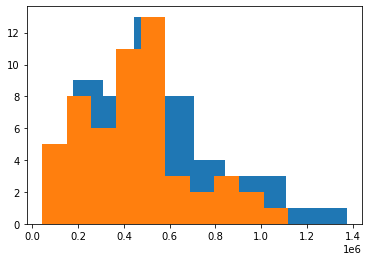

In [15]:
##Histogram of state and mean emissions start of data in 2011 to end of data in 2018
plt.hist(ghg_state_mean_copy['2011'])
plt.hist(ghg_state_mean_copy['2018'])
plt.show()

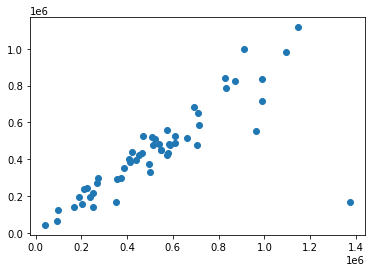

In [16]:
##Plot of emissions in 2011 versus 2018 by state
plt.scatter(ghg_state_mean_copy['2011'], ghg_state_mean_copy['2018'])
## want to change colors to show the difference between 2011 and 2018
##colors = ['red', 'blue']
plt.show()

In [17]:
#Calculate Pearson correlation
print("The Pearson correlation between 2011 and 2018 mean emissions is {} ".format(round(ghg_state_mean_copy["2011"].corr(ghg_state_mean_copy["2018"]),2)))

The Pearson correlation between 2011 and 2018 mean emissions is 0.79 


In [18]:
#Calculate Spearman correlation
print("The spearman correlation between 2011 and 2018 mean emissions is {} ".format(round(ghg_state_mean_copy["2011"].corr(ghg_state_mean_copy["2018"], method= "spearman"),2)))

The spearman correlation between 2011 and 2018 mean emissions is 0.86 


In [19]:
## Sort the data by industry sector
ghg_sector = ghg_data.sort_values(by = ['industry_sector'])
ghg_sector.head()


,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,1006361,110006522735,SANOFI PASTEUR,SWIFTWATER,PA,18370,1 DISCOVERY DRIVE,MONROE,41.09,-75.33,...,C,Chemicals,"36,096.91","35,327.87","34,235.77","33,879.27","31,268.73","32,635.40","38,231.80","40,144.10"
1545,1002301,110014466372,"CF INDUSTRIES NITROGEN, LLC - DONALDSONVILLE N...",DONALDSONVILLE,LA,70346,39018 HIGHWAY 3089,ASCENSION PARISH,30.10,-90.96,...,"C,G,V",Chemicals,"8,685,862.01","8,730,636.16","7,829,243.01","7,985,546.14","6,716,321.03","6,921,307.32","6,854,461.60","6,438,066.71"
4040,1006673,110000845186,"DuPont Nutrition USA, Inc",NEWARK,DE,19711,1301 OGLETOWN ROAD,NEW CASTLE COUNTY,39.68,-75.72,...,C,Chemicals,"28,591.49","31,819.08","3,108.99","31,445.73","29,794.09","32,917.48","30,264.24","32,833.48"
3235,1005292,110063007035,STEPAN CO,ELWOOD,IL,60421,22500 WEST MILLSDALE ROAD,WILL COUNTY,41.44,-88.16,...,C,Chemicals,"26,749.50","30,957.38","27,561.80","31,571.23","38,129.26","39,376.85","34,407.12","34,781.77"
4031,1006664,110018270672,Solvay USA,CHICAGO HEIGHTS,IL,60411,1020 STATE ST,COOK COUNTY,41.51,-87.62,...,C,Chemicals,"31,587.13","31,027.88","31,352.53","27,838.60","32,220.23","30,600.78","27,726.80","27,774.30"


In [20]:
## Subset the state data to only contain the industry sector and years
ghg_sector_mean = ghg_sector[["industry_sector", "2018","2017","2016","2015","2014","2013","2012","2011"]]
ghg_sector_mean.head()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,Chemicals,"36,096.91","35,327.87","34,235.77","33,879.27","31,268.73","32,635.40","38,231.80","40,144.10"
1545,Chemicals,"8,685,862.01","8,730,636.16","7,829,243.01","7,985,546.14","6,716,321.03","6,921,307.32","6,854,461.60","6,438,066.71"
4040,Chemicals,"28,591.49","31,819.08","3,108.99","31,445.73","29,794.09","32,917.48","30,264.24","32,833.48"
3235,Chemicals,"26,749.50","30,957.38","27,561.80","31,571.23","38,129.26","39,376.85","34,407.12","34,781.77"
4031,Chemicals,"31,587.13","31,027.88","31,352.53","27,838.60","32,220.23","30,600.78","27,726.80","27,774.30"


In [21]:
## Find the range of the dataset
ghg_sector_mean.describe()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
count,5183,5183,5183,5183,5183,5183,5183,5183,5183
unique,59,5168,5168,5172,5175,5176,5172,5173,5171
top,Power Plants,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freq,1208,15,15,7,6,8,10,9,11


In [22]:
## Remove the commas from the strings of numbers in order to convert strings to floats
ghg_sector_mean_copy = ghg_sector_mean.copy()
for col in ghg_sector_mean_copy:
    for row in range(num_rows):
        ghg_sector_mean_copy[col].loc[row] = ghg_sector_mean_copy[col].loc[row].replace(",","")
ghg_sector_mean_copy.head()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,Chemicals,36096.91,35327.87,34235.77,33879.27,31268.73,32635.40,38231.80,40144.10
1545,Chemicals,8685862.01,8730636.16,7829243.01,7985546.14,6716321.03,6921307.32,6854461.60,6438066.71
4040,Chemicals,28591.49,31819.08,3108.99,31445.73,29794.09,32917.48,30264.24,32833.48
3235,Chemicals,26749.50,30957.38,27561.80,31571.23,38129.26,39376.85,34407.12,34781.77
4031,Chemicals,31587.13,31027.88,31352.53,27838.60,32220.23,30600.78,27726.80,27774.30


In [23]:
## Change the type of the year columns to floats in order to calcualte the mean (they are originally strings)
ghg_sector_mean_copy = ghg_sector_mean_copy.astype({"2018": 'float64', "2017": 'float64', "2016":'float64', "2015": 'float64', "2014": 'float64', "2013": 'float64', "2012": 'float64', "2011": 'float64'})
ghg_sector_mean_copy.head()

,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
3881,Chemicals,36096.91,35327.87,34235.77,33879.27,31268.73,32635.40,38231.80,40144.10
1545,Chemicals,8685862.01,8730636.16,7829243.01,7985546.14,6716321.03,6921307.32,6854461.60,6438066.71
4040,Chemicals,28591.49,31819.08,3108.99,31445.73,29794.09,32917.48,30264.24,32833.48
3235,Chemicals,26749.50,30957.38,27561.80,31571.23,38129.26,39376.85,34407.12,34781.77
4031,Chemicals,31587.13,31027.88,31352.53,27838.60,32220.23,30600.78,27726.80,27774.30


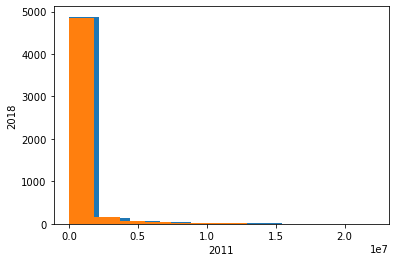

In [24]:
##Histogram of industry and mean emissions start of data to end of data
plt.hist(ghg_sector_mean_copy['2011'])
plt.hist(ghg_sector_mean_copy['2018'])
plt.xlabel('2011')
plt.ylabel('2018')
plt.show()

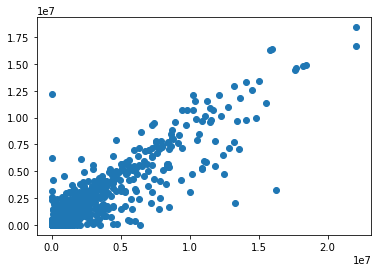

In [25]:
##Scatter plot of emissions in 2011 versus 2018 by state
plt.scatter(ghg_sector_mean_copy['2011'], ghg_sector_mean_copy['2018'])
##colors = ['red', 'blue']
plt.show()

In [26]:
## How do we plot each state's emission trends over the years?
#ghg_data.melt(ghg_data, id_vars=['2011'], value_vars=['2018'])

In [27]:
## Load class survey data
class_data = pd.read_csv("global_climate_change_class_survey_responses.csv")
class_data.head()

,Unnamed: 0,Unnamed: 1,18,9,26,27,24,Unnamed: 7,Unnamed: 8,3,...,27.1,28,Unnamed: 71,0.1,2.2,4.2,7.2,58,32.1,Unnamed: 78
0,Timestamp,3. What academic year did you enroll in COMM 1...,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,4. What is/was your major?,5. When did you graduate from SJSU?,Spring 2008,...,Used a bicycle instead of a car as transportat...,The course didn’t have an influence on my tran...,19. As a result of my participation in this co...,All the time,Often2,Sometimes3,Occasionally4,Never,The course had no influence on my purchase of ...,NaN
1,11/25/2015 13:43:47,2007-2008,1,0,0,0,0,Economics,Fall 2010,0,...,1,0,Never,0,0,0,0,1,0,NaN
2,11/25/2015 13:48:31,2010-2011,0,0,0,1,0,Business,After Fall 2012,0,...,0,1,The course had no influence on my purchase of ...,0,0,0,0,0,1,NaN
3,11/25/2015 13:54:36,2011-2012,0,0,0,0,1,Environmental Studies/ green building and ener...,After Fall 2012,0,...,1,0,The course had no influence on my purchase of ...,0,0,0,0,0,1,NaN
4,11/25/2015 14:09:40,2010-2011,0,0,0,1,0,Environmental Science,Fall 2011,0,...,0,0,The course had no influence on my purchase of ...,0,0,0,0,0,1,NaN


We found this dataset really interesting to see people's habits on sustainability over time after education on climate change but are not sure exactly how to work with the data. We are thinking of plotting the behaviors over time to see trends in sustainable habits and see how those compare to the trends in pollution over time.

In [29]:
recycling = pd.read_csv("recycling-diversion-and-capture-rates-1.csv")
recycling.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


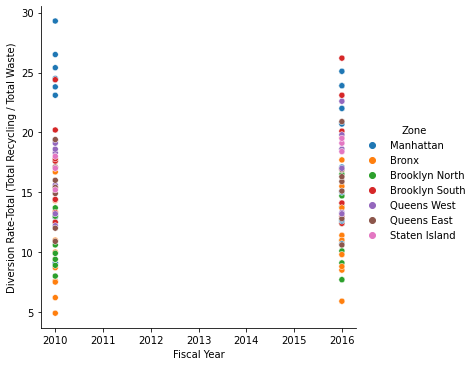

In [30]:
sns.relplot(x="Fiscal Year", y="Diversion Rate-Total (Total Recycling / Total Waste)", hue="Zone", data=recycling)

In [36]:
recycle_2010 = recycling.iloc[0:59]
recycle_2016 = recycling.iloc[59:]

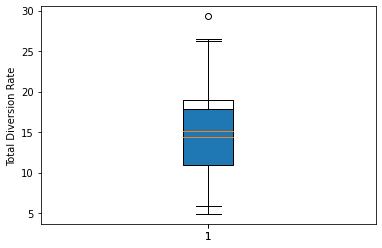

In [43]:
plt.boxplot(recycle_2010["Diversion Rate-Total (Total Recycling / Total Waste)"], patch_artist=True)
plt.boxplot(recycle_2016["Diversion Rate-Total (Total Recycling / Total Waste)"])
plt.ylabel("Total Diversion Rate")
plt.show()

In [44]:
bike = pd.read_csv("201306-citibike-tripdata.csv")
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [46]:
routes = pd.read_csv("bicycle-routes-1.csv")
routes.head()

,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,09/25/2008 12:00:00 AM +0000,09/25/2008 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,07/01/1980 12:00:00 AM +0000,07/01/1980 12:00:00 AM +0000,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,06/01/2006 12:00:00 AM +0000,07/01/2017 12:00:00 AM +0000,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,09/12/2012 12:00:00 AM +0000,09/12/2012 12:00:00 AM +0000,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,NaN,Standard,43043.0,0.000748


In [95]:
type(routes["instdate"][0])

str

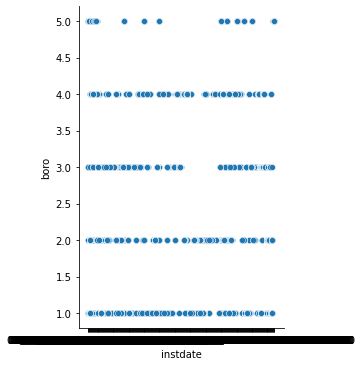

In [47]:
sns.relplot(x="instdate", y="boro", data=routes)

In [48]:
routes.boro.value_counts()

3    4734
1    4253
4    3758
2    2475
5     748
Name: boro, dtype: int64

In [50]:
recycling.Zone.value_counts()

Bronx             36
Manhattan         36
Brooklyn South    27
Brooklyn North    27
Queens West       21
Queens East       21
Staten Island      9
Name: Zone, dtype: int64

In [81]:
recycling_subset = recycling.groupby(by='Zone')['Diversion Rate-Total (Total Recycling / Total Waste)', 'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].mean() 
recycling_subset = pd.DataFrame(recycling_subset)
recycling_subset

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
Zone,,
Bronx,11.558333,35.425000
Brooklyn North,11.844444,34.470370
Brooklyn South,17.240741,48.118519
Manhattan,18.705556,43.255556
Queens East,15.366667,45.485714
Queens West,17.261905,47.600000
Staten Island,18.244444,54.577778


In [82]:
recycling_subset = recycling_subset.reset_index(level=0)
recycling_subset.head()

,Zone,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Bronx,11.558333,35.425000
1,Brooklyn North,11.844444,34.470370
2,Brooklyn South,17.240741,48.118519
3,Manhattan,18.705556,43.255556
4,Queens East,15.366667,45.485714


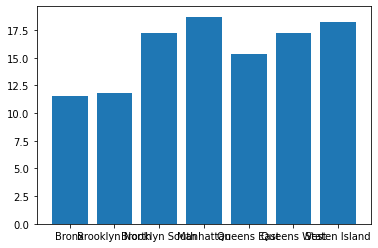

In [83]:
plt.bar(recycling_subset["Zone"], recycling_subset["Diversion Rate-Total (Total Recycling / Total Waste)"])
plt.show()

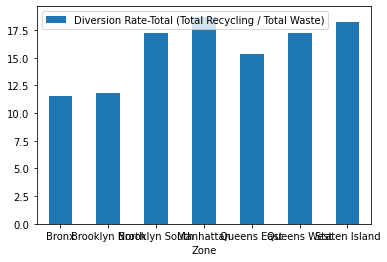

In [84]:
ax = recycling_subset.plot.bar(x='Zone', y='Diversion Rate-Total (Total Recycling / Total Waste)', rot=0)

In [71]:
ghg_data.state.value_counts()

TX    514
CA    337
LA    232
PA    230
IL    226
OH    203
MI    189
NY    179
IN    166
FL    157
AL    146
GA    136
IA    134
KY    119
WI    117
VA    113
MN    113
NC    110
OK    105
TN     97
KS     96
MO     94
CO     90
AR     84
MS     83
SC     83
NJ     77
WV     75
WA     75
AZ     70
MA     68
NE     65
MD     56
UT     54
NM     53
OR     48
WY     47
ND     39
CT     36
ID     32
NV     30
AK     29
SD     28
HI     26
MT     25
ME     22
PR     17
DE     16
NH     16
RI     10
VT      7
VI      4
DC      3
GU      2
Name: state, dtype: int64

In [88]:
ghg_data_ny = ghg_data.query("state == 'NY'")
ghg_data_ny.head()

,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,longitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
54,1000077,110000774797,"REPUBLIC STEEL, LACKAWANNA",BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,-78.85,...,C,Metals,"78,801.40","76,235.01","61,447.47","73,193.02","77,355.81","71,702.38","80,619.20","72,355.73"
63,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,-73.67,...,"C,TT","Other,Waste","134,663.45","131,363.56","125,491.33","126,818.78","127,808.87","132,095.46","120,944.74","142,529.89"
70,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,-73.85,...,D,Power Plants,"1,381,328.03","1,487,213.14","1,514,867.54","1,285,191.24","1,026,373.20","1,376,177.50","2,133,936.99","1,566,947.61"
76,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,-73.97,...,"C,D",Power Plants,"31,069.94","22,460.32","26,369.45","18,559.93","20,816.32","26,629.45","26,775.50","45,473.83"
79,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,-73.95,...,"C,D",Power Plants,"35,221.82","28,073.30","28,262.00","27,000.90","26,232.55","43,133.84","38,257.51","44,820.68"


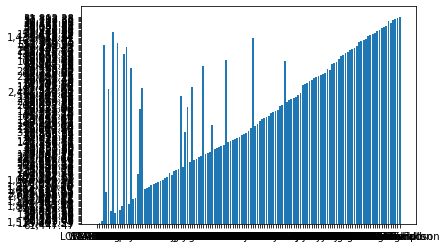

In [90]:
plt.bar(ghg_data_ny["city"], ghg_data_ny["2016"])
plt.show()

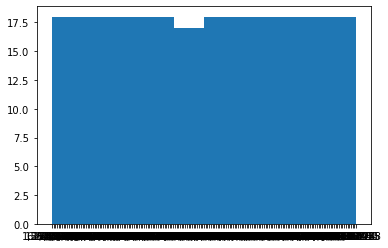

In [91]:
plt.hist(ghg_data_ny["2016"])
plt.show()

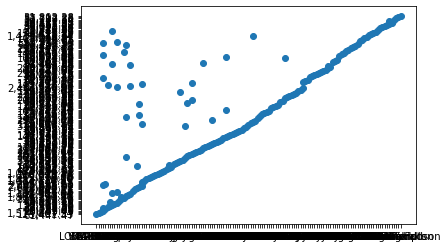

In [92]:
plt.scatter(ghg_data_ny["city"], ghg_data_ny["2016"])
plt.show()

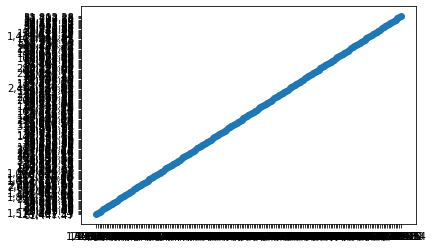

In [93]:
plt.scatter(ghg_data_ny["2011"], ghg_data_ny["2016"])
plt.show()

 Clustered by region, given how much people are recycling, can we predict how many bike rides there are?

Can the increase in recycling and pollution be represented with a linear model? Are they proportional?